# Lab assignment: implementing Random Forests

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/randomForest.jpg" style="width:600px;height:450px;">

<div style="float: right;">(Oma Forest, Basque Country, photo by <a href=https://www.flickr.com/photos/belarusian/>Ilya Kuzniatsou</a>)</div>

In this assignment we will implement the Random Forest classifier method. We will do so based on the efficient classification trees available in scikit-learn, and will test the validity of our implementation by performing several tests on classification datasets.

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
You will need to solve a question by writing your own code or answer in the cell immediately below or in a different file, as instructed.</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
This is a hint or useful observation that can help you solve this assignment. You should pay attention to these hints to better understand the assignment.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/pro.png" height="80" width="80" style="float: right;"/>

***
<font color=#259b4c>
This is an advanced exercise that can help you gain a deeper knowledge into the topic. Good luck!</font>

***

To avoid missing packages and compatibility issues you should run this notebook under one of the [recommended Ensembles environment files](https://github.com/albarji/teaching-environments-ensembles).

In this assignment you will work both in this notebook and on external code files, where you will implement some libraries. The following code allows automatic reloading of such external modules into this notebook every time they are modified.

In [4]:
%load_ext autoreload
%autoreload 2
%aimport randomforest

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The following code will embed any plots into the notebook instead of generating a new window:

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press 
Shift+Tab to produce a pop-out with related documentation. This will only work inside code cells. 

Let's go!

## Data loading

In this assignment we will work with the same datasets as in the previous notebook. If you managed to create the pickle file with all datasets information, you can just copy it to this notebook's folder, and run the following code.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
     Copy to this folder the <b>datasets.pkl</b> you created in the previous notebook, then run the following cell to load the data.
</font>

***

In [6]:
import pickle as pkl

with open('datasets.pkl', 'rb') as file:
    datasets = pkl.load(file)

If you have loaded the data properly, the following should print the whole structure:

In [7]:
print(datasets)

{'breastcancer': {'train': (array([[-0.69885702,  0.90363699,  0.59598884, ...,  0.97475967,
        -0.98230246,  0.51629307],
       [-1.6961842 ,  0.90363699,  1.5238351 , ...,  0.97475967,
         0.62937942,  0.51629307],
       [-0.69885702,  0.90363699, -0.33185742, ...,  0.97475967,
        -0.17646152,  0.51629307],
       ...,
       [-0.69885702,  0.90363699,  2.4516814 , ..., -1.0184056 ,
        -0.17646152,  0.51629307],
       [ 0.29847018, -0.8905408 ,  0.59598884, ..., -1.0184056 ,
         1.4352204 , -1.9227466 ],
       [-0.69885702,  0.90363699,  0.59598884, ...,  0.97475967,
        -0.98230246,  0.51629307]]), array([ 1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1.,
       -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,
        1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,
        1., -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1.

## Random Forests

We will now work on the external *randomforest.py* file to implement the Random Forest classifier. We will start with the required auxiliary functions.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
 In the <b>randomforest.py</b> file, write the contents of the <b>bootstrap</b> function, which receives a matrix of inputs <i>X</i> and a vector of outputs <i>y</i>, and returns a tuple <i>(X,y)</i> with new inputs and outputs, of the same length as the original ones, but with items obtained by applying sampling with replacement over the original data.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
You can find methods for selecting random elements in the <a href=https://docs.python.org/3/library/random.html>random library</a>
</font>

***

If done properly, the following should work, showing some repeated patterns from the original sample:

In [8]:
import numpy as np

randomforest.bootstrap(
    X=np.array([
        [1, 1, 1],
        [2, 2, 2],
        [3, 3, 3],
        [4, 4, 4],
        [5, 5, 5],
    ]),
    y = np.array([1, 2, 3, 4, 5])
)

(array([[5, 5, 5],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [5, 5, 5]]),
 array([5, 1, 1, 1, 5]))

Now for the RandomForest class. Take a look at the code, and how the constructor method (`__init__`) receives two arguments:
* `self`: in python, all methods inside a class have `self` as their first arguments. Through `self` we are able to save variables inside the class.
* `nestimators`: this is the number of trees the random forest will need to create. Check how this variable is stored inside the random forest with `self.nestimators = nestimators`.

Also, notice how the line `self._estimators = []` creates an empty list inside the random forest. This will be used to store all the trees created in the training of the forest.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
  In the <b>randomforest.py</b> file, implement the <b>fit</b> method inside the <b>RandomForest</b> class. This methods receives a X numpy array with the input data to train, as well as a y numpy array with the targets to use in the training. The method should do the following:
     <ul>
         <li>For each tree to build (self.nestimators):</li>
         <ul>
             <li>Create a bootstrap sample of the training data (using the bootstrap function you wrote before).</li>
             <li>Create a <a href=http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html>DecisionTreeClassifier</a>, configured to take a random subset of $\sqrt{d}$ features at each node, with $d$ the number of features in the training set. Check the documentation to identify which parameter to use for this.</li>
             <li>Train the tree with the bootstrap sample</li>
             <li>Add the trained tree to self._estimators</li>
         </ul>
     </ul>
</font>

***

This should be enough to build our first Random Forest! If you have done a correct implementation, the following code should train a random forest with 3 trees.

In [9]:
forest = randomforest.RandomForest(nestimators = 3)
forest.fit(*datasets["thyroid"]["train"])
forest._estimators

[DecisionTreeClassifier(max_features='auto'),
 DecisionTreeClassifier(max_features='auto'),
 DecisionTreeClassifier(max_features='auto')]

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
 In the <i>randomforest.py</i> file, implement the <b>predict</b> method inside the <b>RandomForest</b> class. This methods receives a X numpy array with the input data to predict. The method should return a one-dimensional numpy array with the labels predicted for each one of the input patterns. The predicted label for a pattern should be the label with most votes in the decision tree ensemble.
</font>

***


Now we can generate predictions for the test set:

In [10]:
forest.predict(datasets["thyroid"]["test"][0])

array([ 1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,
       -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,
       -1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,
        1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1.])

Was that a good prediction? Since our RandomForest implementation inherits from scikit-learn ClassifierMixin we can make use of the usual **score** method:

In [11]:
print("Prediction accuracy", forest.score(*datasets["thyroid"]["test"]))

Prediction accuracy 0.96


## Studying the influence of the forest size

We have a running Random Forest implementation and a bunch of datasets, so let's try to draw some empirical conclusions on the Random Forest method.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
 For each available dataset, train a Random Forest classifier for ensemble sizes of 1, 2, 5, 10, 20, 50, and 100. Compute the score on the corresponding tests sets for each of these classifiers. Create a visualization that shows how the accuracy of the classifier evolves as the ensemble size grows.
</font>

***


C:\Anaconda3\envs\ensembles-labs\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


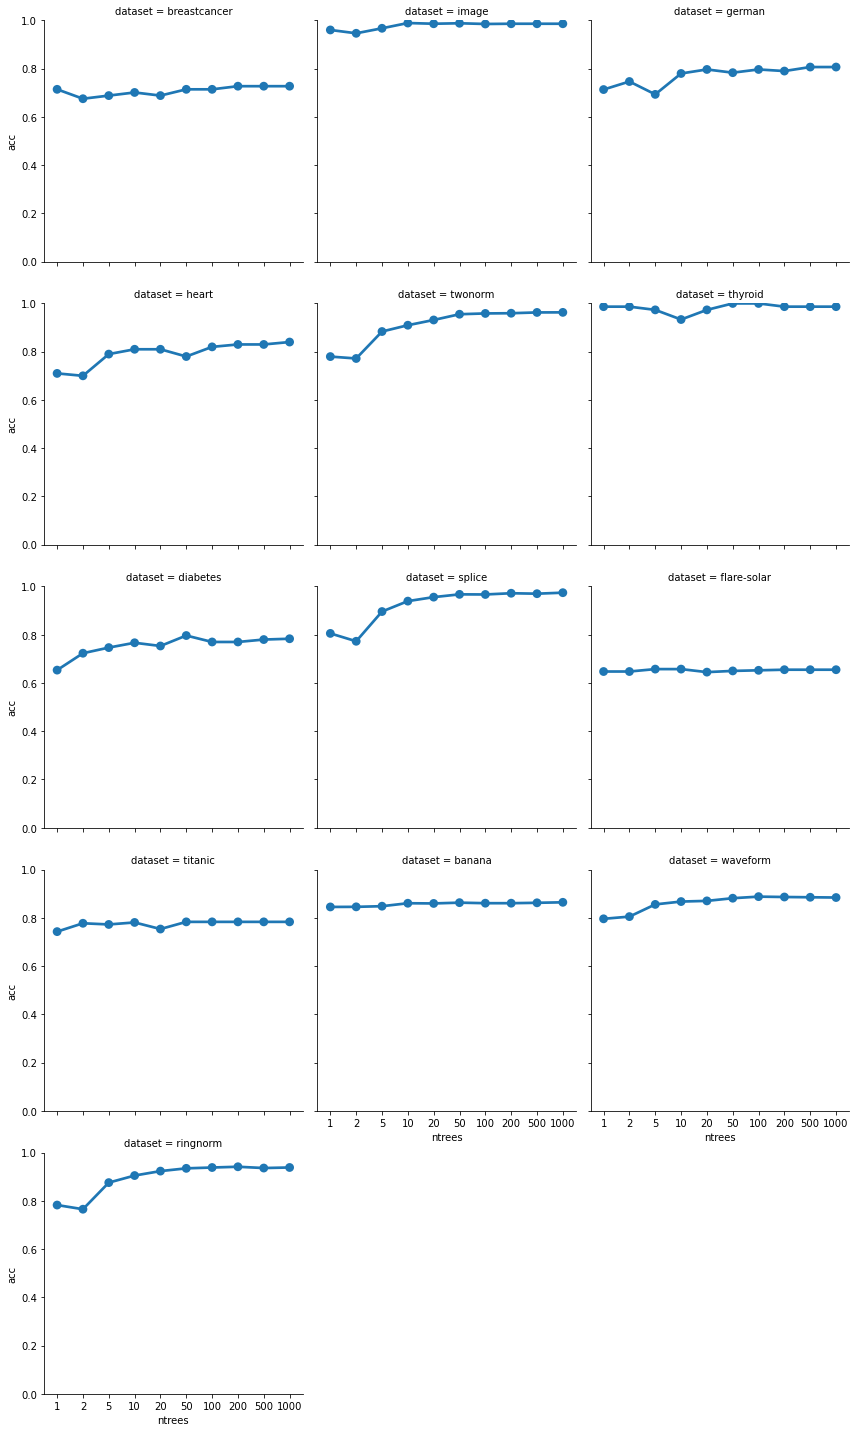

In [12]:
####### INSERT YOUR CODE HERE
import seaborn as sns
import pandas as pd

def trainscore(X, y, Xte, yte, estimator):
    estimator.fit(X, y)
    return estimator.score(Xte, yte)

trange = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

accs = {
    name: {
        ntrees :
        trainscore(*datasets[name]["train"], *datasets[name]["test"], randomforest.RandomForest(nestimators=ntrees))
        for ntrees in trange
    }
    for name in datasets
}
resdf = pd.DataFrame({
        "dataset" : [name for name in accs for ntrees in accs[name]],
        "ntrees" : [ntrees for name in accs for ntrees in accs[name]],
        "acc" : [accs[name][ntrees] for name in accs for ntrees in accs[name]]
    })

g = sns.FacetGrid(resdf, col="dataset", col_wrap=3, height=4, ylim=(0, 1))
g = g.map(sns.pointplot, "ntrees", "acc")

## Bonus round

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/pro.png" height="80" width="80" style="float: right;"/>

***
<font color=#259b4c>
 scikit-learn includes an optimized implementation of the <a href=https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html>Random Forest</a> method. Compare your implementation of Random Forest against this one, by creating a visualization that shows training times for both approaches on different datasets.

***

In [13]:
####### INSERT YOUR CODE HERE